In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import os

import matplotlib
matplotlib.use("TkAgg")
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg, NavigationToolbar2Tk 
from matplotlib.figure import Figure

import matplotlib.animation as animation
from matplotlib import style

from math import pi

import re
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

import tkinter as tk
from tkinter import ttk

LARGE_FONT = ("Verdana", 12)
style.use("ggplot")

In [7]:
def normalizacionColumna(df, i):
    columns = df.columns.values
    df[columns[i]] = (df[columns[i]] - data[columns[i]].min()) / (df[columns[i]].max() - data[columns[i]].min())
def normalizarDataset(data, indices):
    df = data.copy()
    for i in indices:
        normalizacionColumna(df, i)
    return df

def radarPlot(df, row, categorias, color,title):
    N = len(categorias)
    #repetir el primer valor para tener una figura cerrada (poligono)
    valores = df.loc[df.index[row]].values[categorias].flatten().tolist()    
    valores += valores[:1]
    #calcular el angulo
    angulos = [n / float(N) * 2 * pi for n in range(N)]
    angulos += angulos[:1]
    #inicializar el plot
    ax = plt.subplot(3, 2, row + 1, polar=True, )
    # primer eje arriba:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)
    #un eje por atributo + etiquetas
    etiquetas = [df.columns[i] for i in categorias]
    plt.xticks(angulos[:-1], etiquetas, color='grey', size=8)
    ax.set_rlabel_position(0)
    #dibujar ticks de los ejes
    tic = 5
    plt.yticks([i * (1.0 / tic) for i in range(1,tic)], [str(i * (1.0 / tic)) for i in range(1,tic)], color="grey", size=7)
    plt.ylim(0,1)
    #plotear
    ax.plot(angulos, valores, color=color, linewidth=2, linestyle='solid')
    ax.fill(angulos, valores, color=color, alpha=0.4)
    plt.title(title, size=11, color=color, y=1.1)

def radarAllPlot(df,categorias):
    my_dpi=96
    plt.figure(figsize=(1000/my_dpi, 1000/my_dpi), dpi=my_dpi)
    # Create a color palette:
    my_palette = plt.cm.get_cmap("Set2", len(df.index))
    for i in range(len(df.index)):
        #print(df.columns[1])
        #print()
        radarPlot(df,i,categorias,my_palette(i), df['Name'][df.index[i]])
        #radarPlot(df,i,categorias,my_palette(i), df["Title"][i])

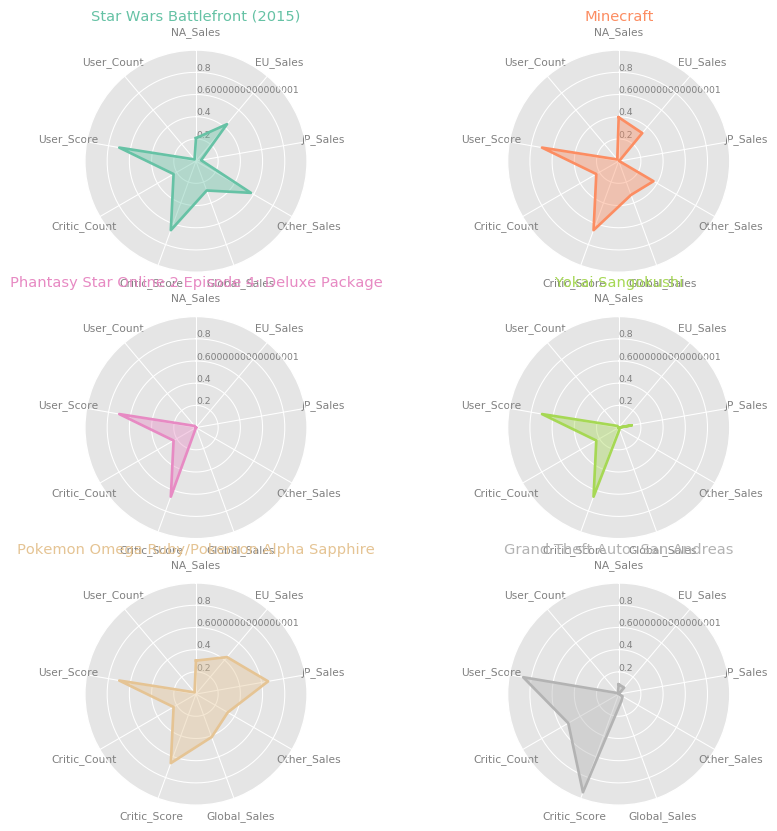

In [11]:
data = pd.read_csv("KNNResult.csv")
dataset_ShortIni = pd.read_csv("shortgamesales.csv")
dataset_KNN = pd.read_csv("KNNResult.csv")
dataset_Skylines = pd.read_csv("SkyLinesResult.csv")
indices = [7,8,9,10,11,12,13,14,15]
#dataset_ShortIni = normalizarDataset(dataset_ShortIni, indices)
dataset_KNN = normalizarDataset(dataset_KNN, indices)
dataset_Skylines = normalizarDataset(dataset_Skylines, indices)



class AppMain(tk.Tk):
    def __init__(self, *args, **kwargs):
        tk.Tk.__init__(self,*args, **kwargs)
        #tk.Tk.iconbitmap(self,default = "icon.ico")
        tk.Tk.wm_title(self, "Aplicacion Trabajo Final Admin Info")
        container = tk.Frame(self)
        container.pack(side="top", fill ="both", expand = True)
        container.grid_rowconfigure(0, weight = 1)
        container.grid_columnconfigure(0, weight = 1)
        self.frames = {}
        for F in (StartPage, PageKNN, PageSkyLines):
            frame = F(container, self)
            self.frames[F] = frame
            frame.grid(row=0, column=0, sticky="nsew")
        self.show_frame(StartPage)
    
    def show_frame(self,cont):
        frame = self.frames[cont]
        frame.tkraise()

class StartPage(tk.Frame):
    def __init__(self, parent, controller):
        tk.Frame.__init__(self,parent)
        label = tk.Label(self, text = "Start Page", font = LARGE_FONT)
        label.pack(pady = 10, padx = 10)
        button1SP = ttk.Button(self, text="Visit PageKNN", 
                            command = lambda: controller.show_frame(PageKNN))
        button1SP.pack()
        
        button2SP = ttk.Button(self, text="Visit PageSkyLines", 
                            command = lambda: controller.show_frame(PageSkyLines))
        button2SP.pack()

class PageKNN(tk.Frame):
    def __init__(self, parent, controller):
        tk.Frame.__init__(self,parent)
        label = tk.Label(self, text = "PageKNN", font = LARGE_FONT)
        label.pack(pady = 10, padx = 10)
        button1P1 = ttk.Button(self, text="Back to Home", 
                            command = lambda: controller.show_frame(StartPage))
        button1P1.pack()
        
        f = Figure(figsize = (5,5), dpi = 100)
        a = f.add_subplot(111)
        
        Dsub = dataset_ShortIni[['Rating','ID']]
        X = np.array(Dsub)
        
        Dsub1 =dataset_KNN[['Rating','ID']]
        X1 = np.array(Dsub1)
        
        a.scatter(X[:,0], X[:,1],label = "Sin Agrupar")
        a.scatter(X1[:,0], X1[:,1],label = "Agrupando")
        
        a.set_xlabel('Rating')
        a.set_ylabel('Game ID')
        
        a.legend(bbox_to_anchor = (0, 1.02, 1, .102),loc = 3, ncol = 2, borderaxespad = 0)
        a.set_title("Antes vs Después")
        
        
        canvas = FigureCanvasTkAgg(f,self)
        canvas.draw()
        canvas.get_tk_widget().pack(side = tk.TOP, fill = tk.BOTH, expand = True)
        
        toolbar = NavigationToolbar2Tk(canvas, self)
        toolbar.update()
        canvas._tkcanvas.pack(side = tk.TOP, fill = tk.BOTH, expand = True)
        
class PageSkyLines(tk.Frame):
    def __init__(self, parent, controller):
        tk.Frame.__init__(self,parent)
        label = tk.Label(self, text = "PageSkyLines", font = LARGE_FONT)
        label.pack(pady = 10, padx = 10)
        button1P2 = ttk.Button(self, text="Back to Home", 
                            command = lambda: controller.show_frame(StartPage))
        button1P2.pack()
        
        dfSky = pd.read_csv('SkyLinesResult_Nilton.csv', sep=',')
        ind = [7,8,9,10,11,12,13,14,15]
        dfSky = normalizarDataset(dfSky, ind)
        radarAllPlot(dfSky.head(6),ind)

app = AppMain()
app.mainloop()

In [122]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sns
import matplotlib.pyplot as plt
import re
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os

In [153]:
def normalizacionColumna(df, i):
    columns = df.columns.values
    df[columns[i]] = (df[columns[i]] - data[columns[i]].min()) / (df[columns[i]].max() - data[columns[i]].min())
def normalizarDataset(data, indices):
    df = data.copy()
    for i in indices:
        normalizacionColumna(df, i)
    return df

In [ ]:
data = pd.read_csv("KNNResult.csv")
indices = [7,8,9,10,11,12,13,14,15]
data = normalizarDataset(data, indices)
#data['Global_Sales'] = data['Global_Sales'].apply(lambda x: x *25)
#data['EU_Sales'] = data['EU_Sales'].apply(lambda x: x *25)
#data['JP_Sales'] = data['JP_Sales'].apply(lambda x: x *25)
#data['User_Score'] = data['User_Score'].apply(lambda x: x *10)
#data['Global_Sales'] = data['Global_Sales'].apply(lambda x: x *10)
data[data['Genre'] == 'Strategy'].sort_values(by = 'Critic_Score', ascending = False).head(10)

In [29]:
# "ID","Name","Platform","Year_of_Release","Genre","Publisher","Global_Sales","Critic_Score","Critic_Count","User_Score",
# "ID","Name","Platform","Year_of_Release","Genre","Publisher","NA_Sales","EU_Sales","JP_Sales","Other_Sales","Global_Sales","Critic_Score","Critic_Count","User_Score",

TypeError: scatter() missing 2 required positional arguments: 'x' and 'y'

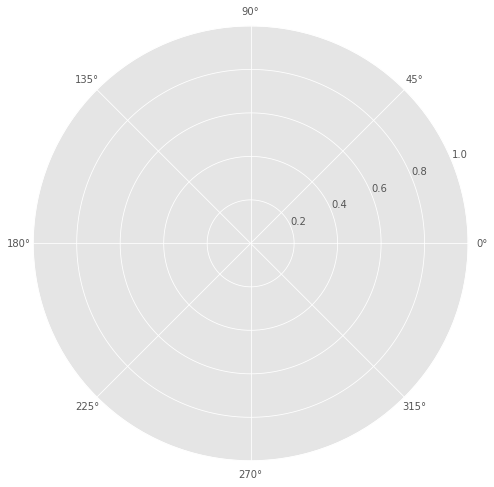

In [172]:
import numpy as np
import matplotlib.pyplot as plt
# Fixing random state for reproducibility
top_fwds = data[data['Genre'] == 'Strategy'].sort_values(by = 'Critic_Score', ascending = False).head(10)
plt_cols = ["Critic_Score", "Critic_Count","User_Score", "NA_Sales","EU_Sales","JP_Sales","Other_Sales","Global_Sales"]
plt_cols = ["Critic_Score", "Critic_Count","User_Score", "NA_Sales","EU_Sales","JP_Sales","Other_Sales","Global_Sales"]
top_fwds.reset_index(inplace=True)

fig = plt.figure()
ax = fig.add_subplot(111, projection='polar')

plt_data = [] 
for i in range(top_fwds.shape[0]):
    trace = ax.scatter(theta = plt_cols, r = top_fwds.loc[i,plt_cols], name = top_fwds.loc[i,'Name'], cmap='hsv', alpha=0.75)
    plt_data.append(trace)
layout = go.Layout(
  polar = dict(
    radialaxis = dict(
      visible = True,
      range = [0, 1],
    )
  ),
    height = 900,
    width = 900,
    title = "Top 10 Strategy Games",
    showlegend = True
)

fig = go.Figure(data=plt_data, layout=layout)
iplot(fig)

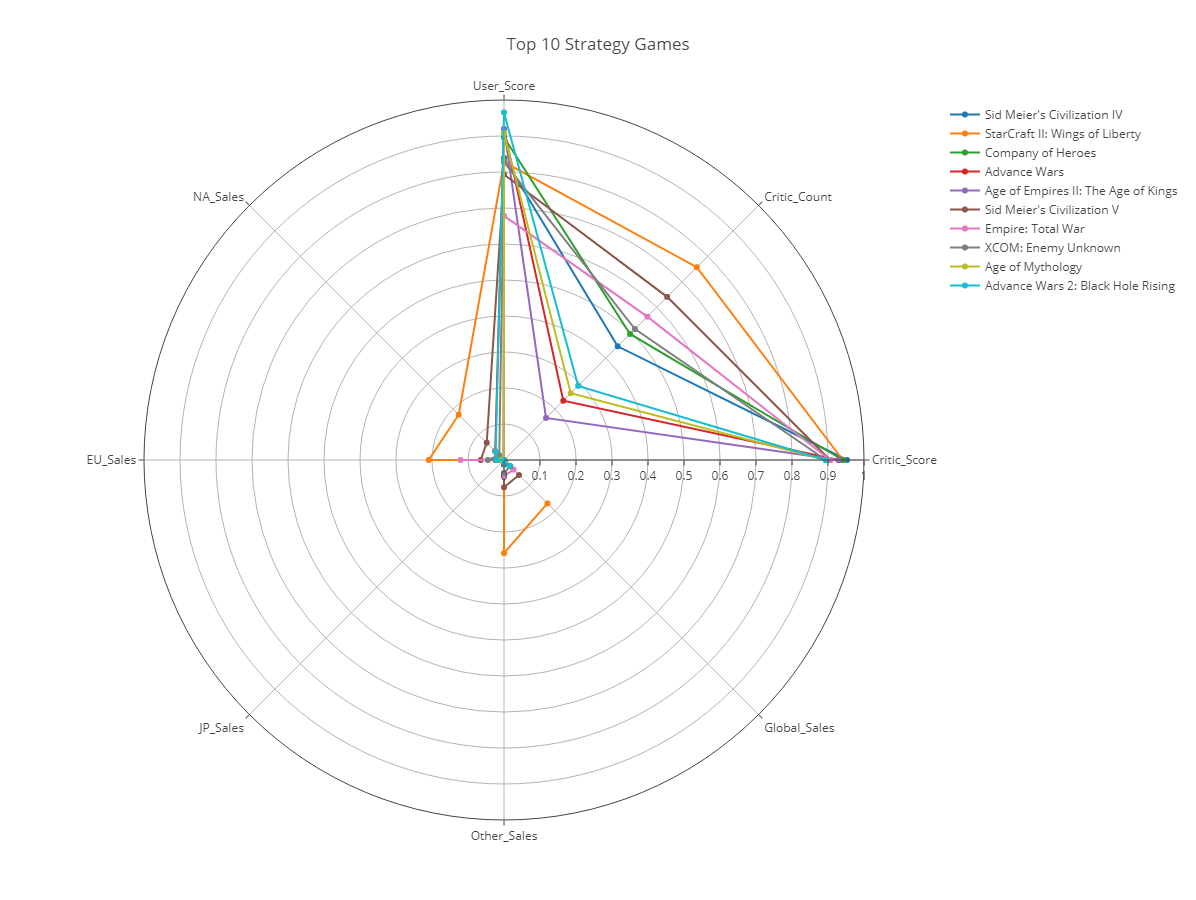

In [124]:
top_fwds = data[data['Genre'] == 'Strategy'].sort_values(by = 'Critic_Score', ascending = False).head(10)
plt_cols = ["Critic_Score", "Critic_Count","User_Score", "NA_Sales","EU_Sales","JP_Sales","Other_Sales","Global_Sales"]
top_fwds.reset_index(inplace=True)
plt_data = [] 
for i in range(top_fwds.shape[0]):
    trace = go.Scatterpolar(
        r = top_fwds.loc[i,plt_cols],
        theta = plt_cols,
        #mode = 'lines',
        name = top_fwds.loc[i,'Name'],
    )
    plt_data.append(trace)
    
layout = go.Layout(
  polar = dict(
    radialaxis = dict(
      visible = True,
      range = [0, 1],
    )
  ),
    height = 900,
    width = 900,
    title = "Top 10 Strategy Games",
    showlegend = True
)

fig = go.Figure(data=plt_data, layout=layout)
iplot(fig)

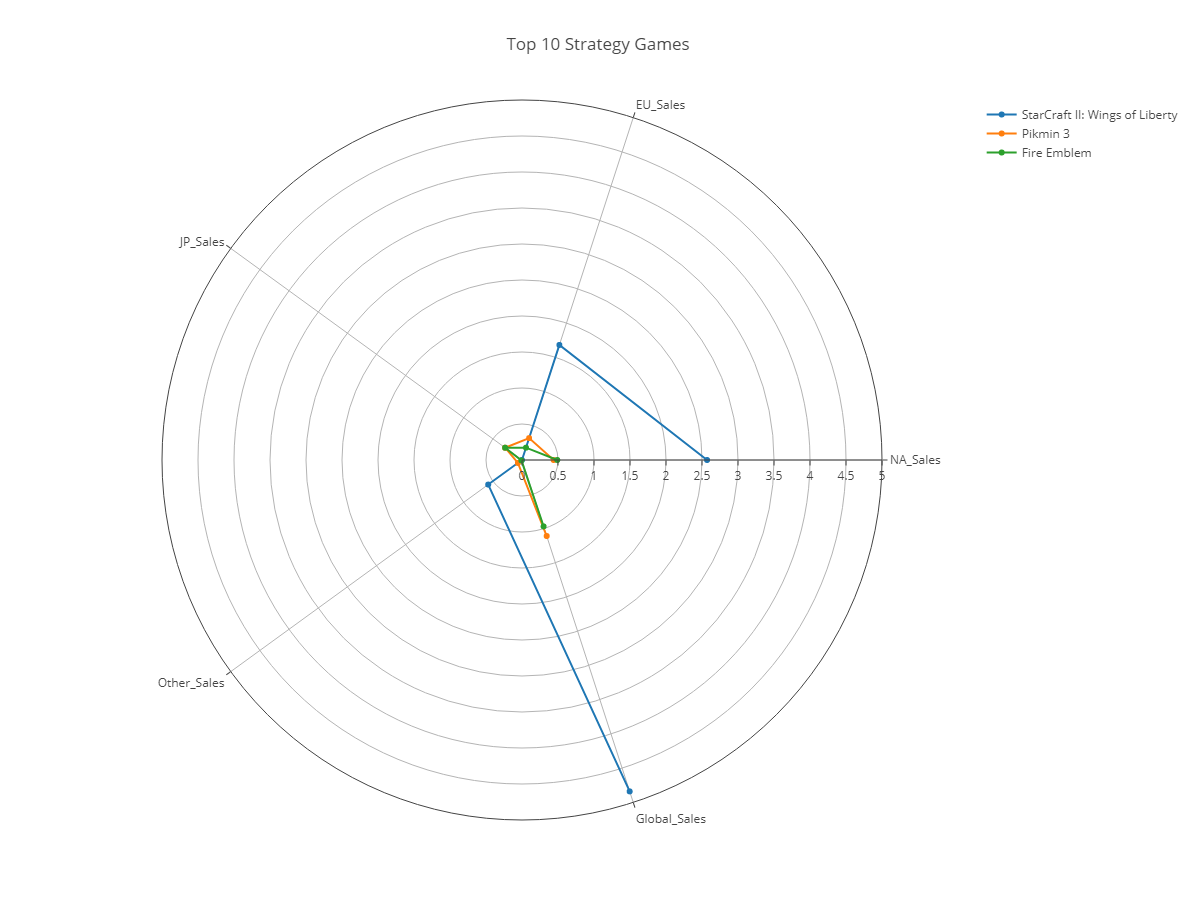

In [48]:
top_fwds = data[data['Genre'] == 'Strategy'].sort_values(by = 'Global_Sales', ascending = False).head(10)
plt_cols = ["NA_Sales","EU_Sales","JP_Sales","Other_Sales","Global_Sales"]
top_fwds.reset_index(inplace=True)
plt_data = [] 
for i in range(top_fwds.shape[0]):
    trace = go.Scatterpolar(
        r = top_fwds.loc[i,plt_cols],
        theta = plt_cols,
        #mode = 'lines',
        name = top_fwds.loc[i,'Name'],
    )
    plt_data.append(trace)
    
layout = go.Layout(
  polar = dict(
    radialaxis = dict(
      visible = True,
      range = [0, 5],
    )
  ),
    height = 900,
    width = 900,
    title = "Top 10 Strategy Games",
    showlegend = True
)

fig = go.Figure(data=plt_data, layout=layout)
iplot(fig)

In [ ]:
# "ID","Name","Platform","Year_of_Release","Genre","Publisher","NA_Sales","EU_Sales","JP_Sales","Other_Sales","Global_Sales","Critic_Score","Critic_Count","User_Score",
#,"ID","Name","Platform","Year_of_Release","Genre","Publisher","NA_Sales","EU_Sales","JP_Sales","Other_Sales","Global_Sales","Critic_Score","Critic_Count","User_Score","User_Count","Developer","Rating"

In [53]:
top_50_games = data[data['Critic_Score']>50].groupby('Platform').mean()['User_Score'].sort_values(ascending = False).head(50)
top_50_games = top_50_games.index.tolist()
top_50_games = data[data['Platform'].isin(top_50_games)]

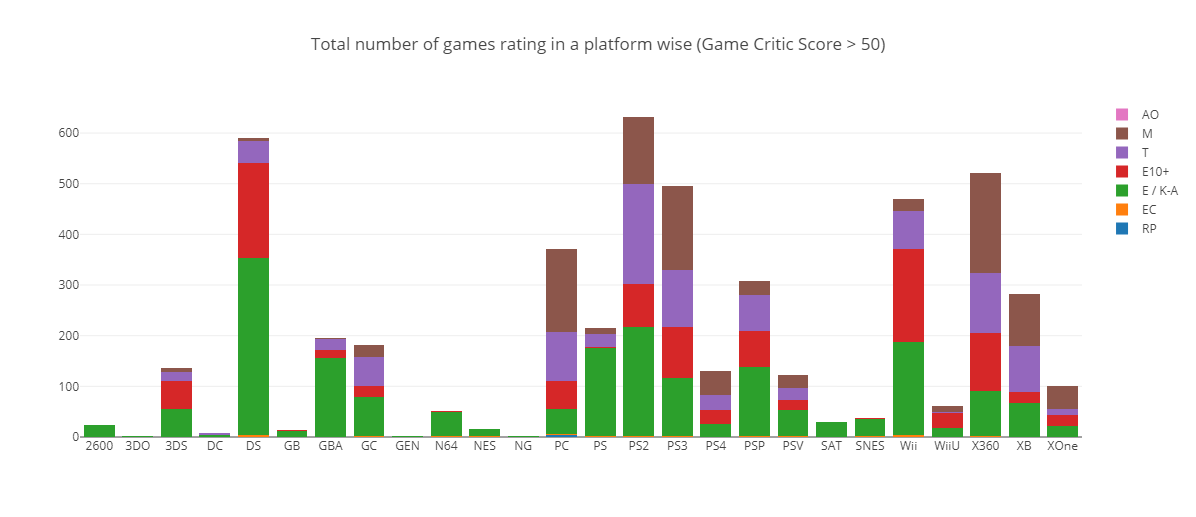

In [56]:
tm = top_50_games.groupby(['Platform','Rating']).agg(['count'])['ID'].unstack()
trace1 = go.Bar(
    x=tm.index,
    y=tm['count'][0],
    name='RP'
)
trace2 = go.Bar(
    x=tm.index,
    y=tm['count'][1],
    name='EC'
)
trace3 = go.Bar(
    x=tm.index,
    y=tm['count'][2],
    name='E / K-A'
)
trace4 = go.Bar(
    x=tm.index,
    y=tm['count'][3],
    name='E10+'
)
trace5 = go.Bar(
    x=tm.index,
    y=tm['count'][4],
    name='T'
)
trace6 = go.Bar(
    x=tm.index,
    y=tm['count'][5],
    name='M'
)
trace7 = go.Bar(
    x=tm.index,
    y=tm['count'][6],
    name='AO'
)
plt_data = [trace1, trace2, trace3, trace4, trace5, trace6, trace7]
layout = go.Layout(
    barmode='stack',
    width=2000,
    height=500,
    title = "Total number of games rating in a platform wise (Game Critic Score > 50)"
)

fig = go.Figure(data=plt_data, layout=layout)
iplot(fig)

In [161]:
# inicializaciones
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12, 8) # (w, h)
from sklearn import metrics
from sklearn.cluster import KMeans

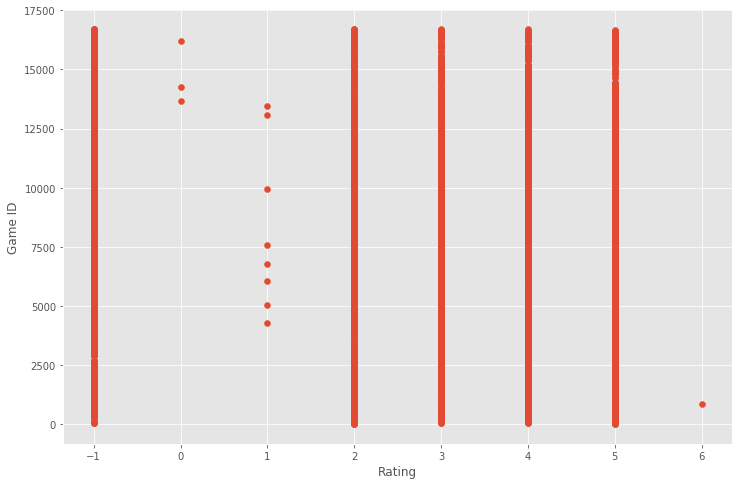

In [191]:
D = pd.read_csv('shortgamesales.csv', sep=',')
Dsub = D[['Rating','ID']]
X = np.array(Dsub)
# Muestra los datos
# Plot
plt.scatter(X[:,0], X[:,1])
plt.xlabel('Rating')
plt.ylabel('Game ID')
plt.show()

In [192]:
kmeans = KMeans(init='k-means++', n_clusters=4, n_init=10)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [193]:
# Calcula los valores en los puntos de una cuadrícula 2D (malla)
h = .1     # punto en la malla [x_min, x_max] x [y_min, y_max].

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
# Generar una cuadrícula de pasos.
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
# etiquetas de puntos de grilla
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
print(Z.shape)

(167120, 90)


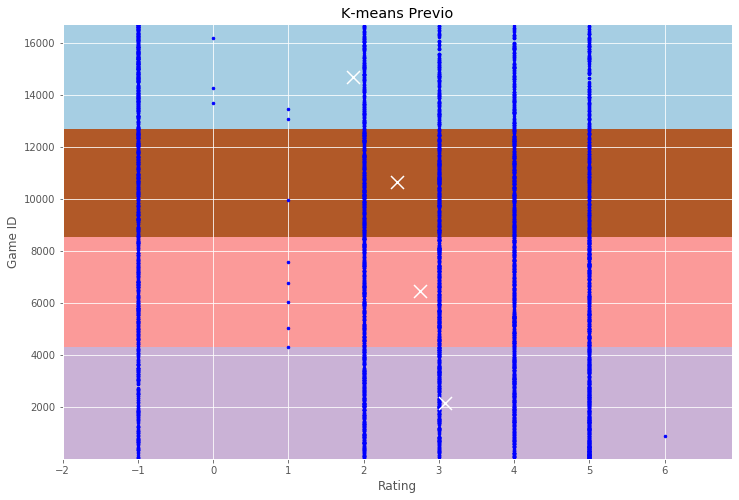

In [194]:
# Muestra
plt.figure(1)
plt.clf()
# Mostrar los puntos de la cuadrícula, como una imagen (interpolación) que da el color de fondo.
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')
# Añade los puntos
plt.plot(X[:, 0], X[:, 1], 'b.', markersize=5)
# Muestra los centroides
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means Previo')
plt.xlabel('Rating')
plt.ylabel('Game ID')
plt.show()

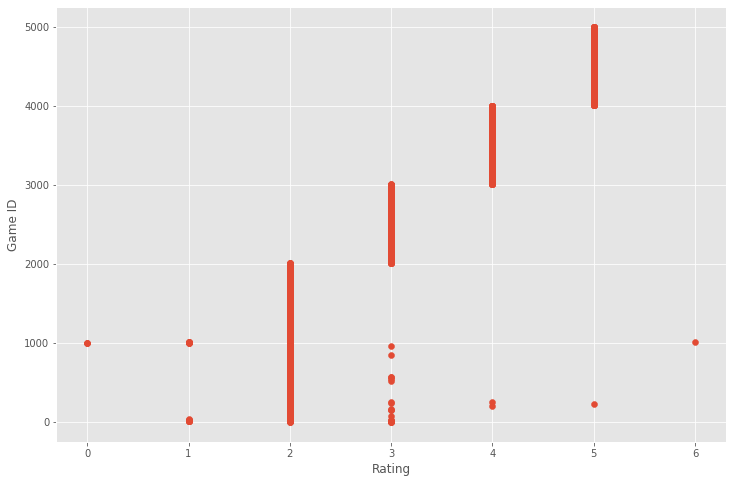

In [195]:
D1 = pd.read_csv('KNNResul_Nilton.csv', sep=',')
Dsub1 = D1[['Rating','ID']]
X1 = np.array(Dsub1)
# Muestra los datos
# Plot
plt.scatter(X1[:,0], X1[:,1])
plt.xlabel('Rating')
plt.ylabel('Game ID')
plt.show()

In [196]:
kmeans = KMeans(init='k-means++', n_clusters=4, n_init=10)
kmeans.fit(X1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [197]:
# Calcula los valores en los puntos de una cuadrícula 2D (malla)
h = .1     # punto en la malla [x_min, x_max] x [y_min, y_max].

x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
# Generar una cuadrícula de pasos.
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
# etiquetas de puntos de grilla
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
print(Z.shape)

(50010, 80)


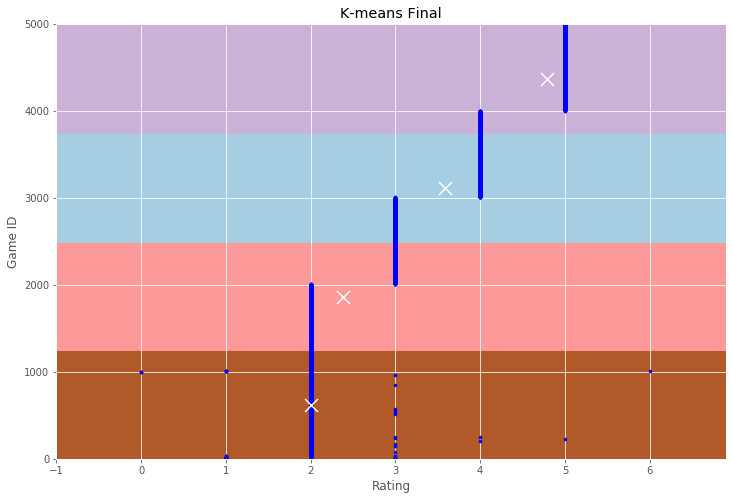

In [198]:
# Muestra
plt.figure(1)
plt.clf()
# Mostrar los puntos de la cuadrícula, como una imagen (interpolación) que da el color de fondo.
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')
# Añade los puntos
plt.plot(X1[:, 0], X1[:, 1], 'b.', markersize=5)
# Muestra los centroides
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means Final')
plt.xlabel('Rating')
plt.ylabel('Game ID')
plt.show()

In [199]:
import matplotlib.pyplot as plt
from math import pi

In [209]:
def radarPlot(df, row, categorias, color,title):
    N = len(categorias)
    #repetir el primer valor para tener una figura cerrada (poligono)
    valores = df.loc[df.index[row]].values[categorias].flatten().tolist()    
    valores += valores[:1]
    #calcular el angulo
    angulos = [n / float(N) * 2 * pi for n in range(N)]
    angulos += angulos[:1]
    #inicializar el plot
    ax = plt.subplot(3, 2, row + 1, polar=True, )
    # primer eje arriba:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)
    #un eje por atributo + etiquetas
    etiquetas = [df.columns[i] for i in categorias]
    plt.xticks(angulos[:-1], etiquetas, color='grey', size=8)
    ax.set_rlabel_position(0)
    #dibujar ticks de los ejes
    tic = 5
    plt.yticks([i * (1.0 / tic) for i in range(1,tic)], [str(i * (1.0 / tic)) for i in range(1,tic)], color="grey", size=7)
    plt.ylim(0,1)
    #plotear
    ax.plot(angulos, valores, color=color, linewidth=2, linestyle='solid')
    ax.fill(angulos, valores, color=color, alpha=0.4)
    plt.title(title, size=11, color=color, y=1.1)

In [210]:
def radarAllPlot(df,categorias):
    my_dpi=96
    plt.figure(figsize=(1000/my_dpi, 1000/my_dpi), dpi=my_dpi)
    # Create a color palette:
    my_palette = plt.cm.get_cmap("Set2", len(df.index))
    for i in range(len(df.index)):
        #print(df.columns[1])
        #print()
        radarPlot(df,i,categorias,my_palette(i), df['Name'][df.index[i]])
        #radarPlot(df,i,categorias,my_palette(i), df["Title"][i])

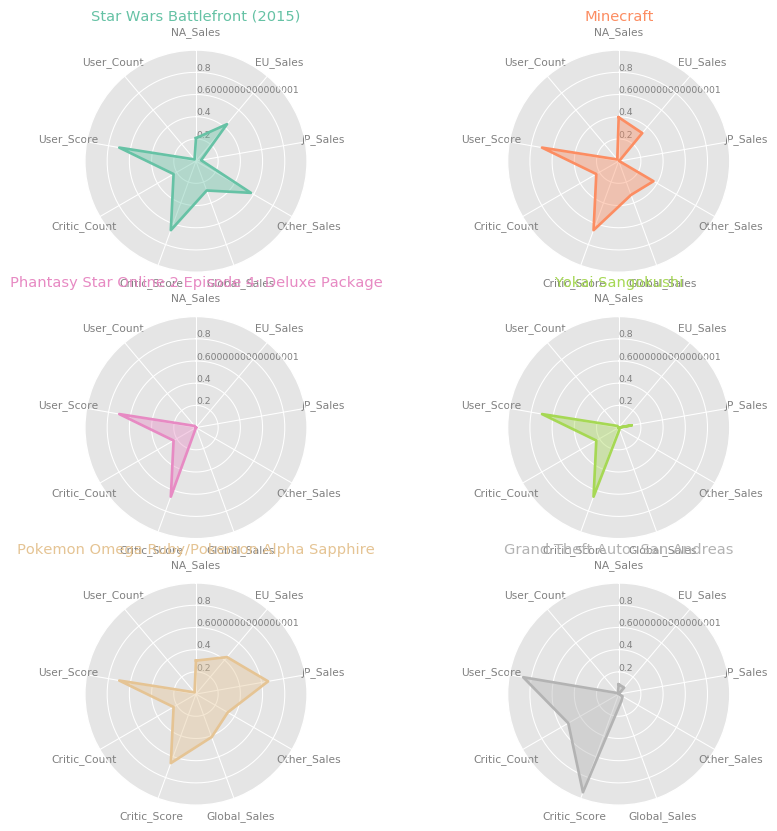

In [10]:
#los 6 skylines juegos
dfSky = pd.read_csv('SkyLinesResult_Nilton.csv', sep=',')
ind = [7,8,9,10,11,12,13,14,15]
dfSky = normalizarDataset(dfSky, ind)
radarAllPlot(dfSky.head(6),ind)
plt.savefig('foo.png')